## 8. 중심극한정리

**여러 번 샘플을 뽑아 그 평균들의 분포를 살펴보면 정규분포와 비슷한 종 모양이 된다.**

**(관련 예제):** 

**0~9까지 10개의 정수값을 균등하게 갖는 모집단(이산균등분포)**

**크기가 5인 표본을 100번 뽑아서 매번 추출된 표본에서 표본 평균을 구하고, 그 평균들을 가지고 히스토그램을 그려라.**

In [1]:
import numpy as np

m = []
np.random.seed(1234)
for i in range(100):
    sample = np.random.randint(0, 10, size=5)
    m.append(np.mean(sample))

m = np.array(m)

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Histogram of m')

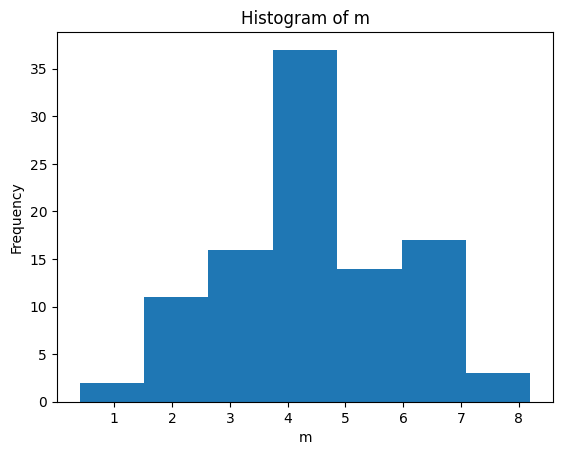

In [2]:
#히스토그램
import matplotlib.pyplot as plt
plt.hist(m, bins=7)
plt.xlabel('m')
plt.ylabel('Frequency')
plt.title('Histogram of m')

Text(0.5, 1.0, 'Normal Q-Q plot')

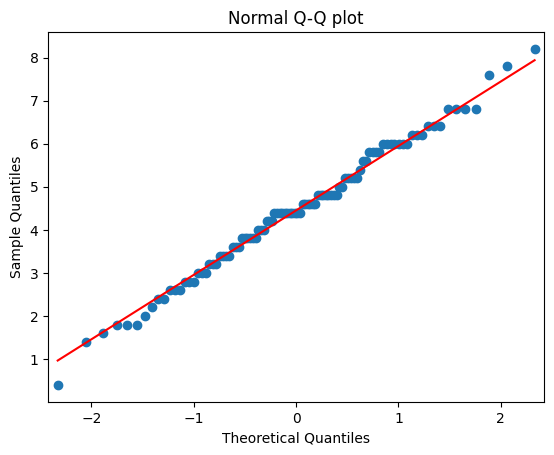

In [3]:
## 정규확률그림 -> 얼마나 정규분포에 가까운지 확인
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(m, line='s')
plt.title("Normal Q-Q plot")

## 9. 모평균의 추정

**(관련 예제): 주어진 자료에 근거해서 중1 남학생의 평균키에 대한 95% 신뢰구간을 구하라.**

In [4]:
import numpy as np
from scipy import stats

height = np.array([163, 161, 168, 161, 157, 162, 153, 159, 164, 170,
                   152, 160, 157, 168, 150, 165, 156, 151, 162, 150,
                   156, 152, 161, 165, 168, 167, 165, 168, 159, 156])

# 1. 요약 통계량 계산
xbar_h = np.mean(height)  # 표본 평균
n = height.size  # 표본 크기

# 2. 표준 오차(Standard Error) 계산
se_h = stats.sem(height)

# 3. 신뢰수준 95%에 해당하는 Z-값 찾기
# 95% 신뢰구간은 양쪽 꼬리에 각각 2.5%의 확률을 가짐
# 누적 확률(왼쪽부터의 넓이)이 1 - 0.05/2가 되는 지점의 x축 값(z-점수)은 무엇인가?
z_alpha = stats.norm.ppf(1 - 0.05/2)

# 4. 오차 범위(Margin of Error) 계산
# 오차범위 = Z-값 * 표준오차
interval = z_alpha * se_h

# 5. 신뢰구간 계산 (표본평균 ± 오차범위)
confidence_interval = [xbar_h - interval, xbar_h + interval]

print(f"표본 평균: {xbar_h:.2f}")
print(f"표준 오차: {se_h:.2f}")
print(f"Z-값: {z_alpha:.2f}")
print(f"오차 범위: {interval:.2f}")
print(f"95% 신뢰구간 (Z-분포 사용): {confidence_interval[0]:.2f} ~ {confidence_interval[1]:.2f}")

표본 평균: 160.20
표준 오차: 1.09
Z-값: 1.96
오차 범위: 2.14
95% 신뢰구간 (Z-분포 사용): 158.06 ~ 162.34


## 9. 모평균에 대한 검정(표본의 크기가 클 때)

**(관련 예제1): 앞서 주어진 중학생의 키 자료로부터 그 도시의 중학교 1학년 남학생의 평균키가 다른 도시의 중학교 1학년 남학생의 평균키인 159cm와 차이가 있다고 할 수 있는지 검정하라.**

가설을 설정한다.

H0: 평균은 159cm로 같다.

H1: 평균은 다르다.

**표본의 크기가 30 이상 -> 가설을 검정하기 위해 검정통계량 Z를 계산한다.**

In [5]:
# 검정통계량Z = (표본평균 - 귀무가설평균) / 표본오차
# 표본 평균이 귀무가설의 평균(159cm)으로부터 표준오차의 몇 배만큼 떨어져 있는가?
zval = (xbar_h - 159)/se_h; print(zval)

1.097127827392377


**Z에 대한 양측검정 P-값을 계산한다.**

대립가설이 **다르다**이므로 **클 경우, 작을 경우를 모두 고려하는 양측검정**을 해야 한다.

P-value는 **양쪽 꼬리넓이의 합**을 구하는 것이다.

In [6]:
pval = 2*(1-stats.norm.cdf(zval));print(pval)

0.27258551722126834


**계산된 P-값이 0.2726으로 상당히 커서 귀무가설 기각X**

**평균은 159cm로 같다.**

**(관련 예제2): 자료로부터 평균교통소음정도에 대한 98% 신뢰구간을 구하고, 평균교통소음정도가 60을 초과한다고 주장할 수 있는지 유의수준 5%에서 가설검정을 실시하라.**

**먼저 98% 신뢰구간을 구한다.**

In [7]:
noise = np.round(np.random.uniform(low=50.0, high=80.0, size=50), 1)

#요약 통계량
xbar_n = np.mean(noise)  # 표본 평균
n = noise.size  # 표본 크기

#표준 오차
se_n = stats.sem(noise)

#신뢰수준 98%에 해당하는 Z값 찾기
z_alpha = stats.norm.ppf(1 - 0.02/2)

# 오차범위 = Z-값 * 표준오차
interval = z_alpha * se_n

# 5. 신뢰구간 계산 (표본평균 ± 오차범위)
confidence_interval = [xbar_n - interval, xbar_n + interval]

print(f"표본 평균: {xbar_n:.2f}")
print(f"표준 오차: {se_n:.2f}")
print(f"Z-값: {z_alpha:.2f}")
print(f"오차 범위: {interval:.2f}")
print(f"98% 신뢰구간 (Z-분포 사용): {confidence_interval[0]:.2f} ~ {confidence_interval[1]:.2f}")

표본 평균: 66.52
표준 오차: 1.31
Z-값: 2.33
오차 범위: 3.05
98% 신뢰구간 (Z-분포 사용): 63.46 ~ 69.57


**가설을 설정한다.**

**H0: 평균교통소음정도 = 60**

**H1: 평균교통소음정도 > 60**

**-> 단측검정에 관한 문제이다.**

**표본의 크기가 30 이상 -> 가설을 검정하기 위해 검정통계량 Z를 계산한다.**

In [8]:
# 검정통계량Z = (표본평균 - 귀무가설평균) / 표본오차
# 표본 평균이 귀무가설의 평균(159cm)으로부터 표준오차의 몇 배만큼 떨어져 있는가?
zval = (xbar_n - 60)/se_n; print(zval)

4.964433461853549


**Z에 대한 단측검정 P-값을 계산한다.**

이때의 P-value는 **한 쪽 꼬리넓이의 합**을 구하는 것이다.

In [10]:
pval = (1-stats.norm.cdf(zval));print(pval)

3.44509513805491e-07


In [11]:
# 이 방법도 가능
pval = stats.norm.sf(np.abs(zval)); print(pval)

3.445095138580887e-07


**pvalue < 0.05 -> 귀무가설 기각한다. 즉, 평균교통소음정도가 60보다 크다.**

## 10. 모집단에 대한 추정 & 검정(표본의 크기가 작을 때)

**모집단이 정규분포를 따르고 모분산이 알려져 있지 않은 경우 -> t분포를 이용한 모평균에 대한 구간추정 & 검정**

**(관련 예제1): 10개의 단위부피당 세균수 데이터, 단위부피당 평균 세균수에 대한 90% 신뢰구간을 구하고 단위부피당 평균 세균수가 200보다 적다고 주장할 수 있는지 검정하라.**

In [24]:
import numpy as np
from scipy import stats

bacteria = np.array([175, 190, 215, 198, 184, 207, 210, 193, 196, 180])

#표본크기
n = bacteria.size

#표본평균
xbar_b = np.mean(bacteria)

#표준오차
se_b = stats.sem(bacteria)

#신뢰수준 90%에 해당하는 t값
t_alpha = stats.t.ppf(1 - 0.1/2, n-1)

#오차범위 = t값 * 표준오차
interval = t_alpha * se_b

#신뢰구간
confidence_interval = [xbar_b - interval, xbar_b + interval]

print(f"표본 평균: {xbar_b:.2f}")
print(f"표준 오차: {se_b:.2f}")
print(f"Z-값: {t_alpha:.2f}")
print(f"오차 범위: {interval:.2f}")
print(f"90% 신뢰구간 (T-분포 사용): {confidence_interval[0]:.2f} ~ {confidence_interval[1]:.2f}")

표본 평균: 194.80
표준 오차: 4.15
Z-값: 1.83
오차 범위: 7.62
90% 신뢰구간 (T-분포 사용): 187.18 ~ 202.42


**가설을 설정한다.  
H0: 단위부피당 평균 세균수 = 200  
H1: 단위부피당 평균 세균수 < 200  
-> 단측검정에 관한 문제이다.  
표본의 크기가 작음 -> 가설을 검정하기 위해 검정통계량 T를 계산한다.**

In [14]:
#검정통계량T = (표본평균 - 귀무가설평균) / 표본오차
tval = (xbar_b - 200)/se_b; print(tval)

-1.2515695604210733


**T에 대한 단측검정 P-값을 계산한다.  
이때의 P-value는 한 쪽 꼬리넓이의 합을 구하는 것이다.**

In [17]:
#좌측검정
pval = stats.t.cdf(tval, n-1); print(pval)

0.12113884687382763


**-> pval > 0.05이므로 귀무가설 기각할 수 없다. 즉, 평균 세균수는 200보다 적다고 안심할 수 없다.**

**(관련 예제2): 주어진 자료를 분석하기 전, 모집단의 정규분포 가정이 필요하다. 우선 정규확률 그림을 그리고 정규성 가정에 대한 적합성을 밝히고, 모평균에 대한 95% 신뢰구간을 구하라.  
                 또한 모평균이 38보다 크다고 할 수 있는지 유의수준 5%로 검정하라.**

In [18]:
x = np.array([31, 35, 37, 38, 38, 38, 39, 40, 40, 41, 42, 43, 44, 44, 46, 48])

**표본의 개수가 적다. -> 신뢰구간 추정 & t검정 하기 전, 모집단이 정규분포를 따른다는 가정이 필요. -> 정규확률그림을 그려 확인**

Text(0.5, 1.0, 'Q-Q plot')

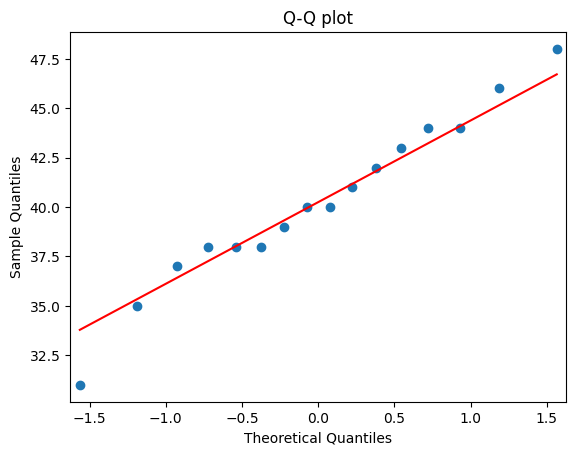

In [22]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.qqplot(x, line='s')
plt.title("Q-Q plot")

**-> 점들이 대체로 직선 위에 위치하고 있다. 따라서 정규분포를 따른다고 가정할 수 있다.**

In [25]:
#표본크기
n = x.size

#표본평균
xbar_x = np.mean(x)

#표준오차
se_x = stats.sem(x)

#신뢰수준 95%에 해당하는 t값
t_alpha = stats.t.ppf(1 - 0.05/2, n-1)

#오차범위 = t값 * 표준오차
interval = t_alpha * se_x

#신뢰구간
confidence_interval = [xbar_x - interval, xbar_x + interval]

print(f"표본 평균: {xbar_x:.2f}")
print(f"표준 오차: {se_x:.2f}")
print(f"Z-값: {t_alpha:.2f}")
print(f"오차 범위: {interval:.2f}")
print(f"95% 신뢰구간 (T-분포 사용): {confidence_interval[0]:.2f} ~ {confidence_interval[1]:.2f}")

표본 평균: 40.25
표준 오차: 1.07
Z-값: 2.13
오차 범위: 2.27
95% 신뢰구간 (T-분포 사용): 37.98 ~ 42.52


**가설을 설정한다.  
H0: 평균 = 38  
H1: 평균 > 38  
-> 단측검정에 관한 문제이다.  
표본의 크기가 작음 -> 가설을 검정하기 위해 검정통계량 T를 계산한다.**

In [26]:
#검정통계량T = (표본평균 - 귀무가설평균) / 표본오차
tval = (xbar_x - 38)/se_x; print(tval)

2.109632539223229


**T에 대한 단측검정 P-값을 계산한다.  
이때의 P-value는 한 쪽 꼬리넓이의 합을 구하는 것이다.**

In [28]:
#우측검정
pval = 1 - stats.t.cdf(tval, n-1); print(pval)

0.026050840503660355


**-> pval < 0.05이므로 귀무가설 기각한다. 즉, 평균은 38보다 크다.**

## 11. 두 모집단의 비교 

주피터 노트북(마크다운)에서 뮤 기호 표시하는 법: "$\mu"

**(관련 예제1): 인공위성이 숲이 있는 지역을 지날 때의 스캐너의 수치, 도시지역을 지날 때의 스캐너의 수치 비교  
두 지역에서 얻어진 스캐너 수치의 평균이 다르면 도시와 숲을 구별하는 데 스캐너 사용 가능  
-> 평균 차의 95% 신뢰구간을 구하고, 스캐너의 사용이 가능한지 판단하라.**

In [41]:
import numpy as np
x = np.array([77, 77, 78, 78, 81, 81, 82, 82, 82, 82,
             82, 83, 83, 84, 84, 84, 84, 85, 86, 86,
             86, 86, 86, 87, 87, 87, 87 ,87 ,87 , 87,
             89, 89, 89, 89, 89, 89, 89, 90, 90, 90,
             91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
             93, 93, 93, 93, 93, 93, 94, 94, 94 ,94,
              94, 94, 94, 94, 94, 94, 94, 94, 95, 95,
             95, 95, 95, 96, 96, 96, 96, 96, 96, 97,
             97, 97, 97, 97, 97, 97, 97, 97, 98, 99,
             100, 100, 100, 100, 100, 100, 100, 100,
             100, 101, 101, 101, 101, 101, 101, 102,
             102, 102, 102, 102, 102, 103, 103, 104,
             104, 104, 105, 107])

y = np.array([71, 72, 73, 74, 75, 77, 78, 79, 79, 79,
             79, 80, 80, 80, 81, 81, 81, 82, 82, 82,
             82, 84, 84, 84, 84, 84, 84, 85, 85, 85,
             85, 85, 85, 86, 86, 87, 88, 90, 91, 94])

**-> 표본의 크기가 모두 30 이상이므로, z-검정 수행**

In [42]:
import numpy as np
import math
from scipy import stats

# 2. 각 표본의 통계량 계산
var1 = np.var(x, ddof=1)
n1 = len(x)
print(f"x의 표본분산: {var1:.2f}")
print(f"x의 표본 크기: {n1}")

var2 = np.var(y, ddof=1)
n2 = len(y)
print(f"y의 표본분산: {var2:.2f}")
print(f"y의 표본 크기: {n2}")

# 3. 표준오차 계산
se = math.sqrt(var1/n1 + var2/n2)
print(f"평균 차의 표준오차: {se:.2f}")

x의 표본분산: 48.06
x의 표본 크기: 118
y의 표본분산: 24.79
y의 표본 크기: 40
평균 차의 표준오차: 1.01


In [43]:
# 4. 표본 평균의 차이 계산
mean_diff = np.mean(x) - np.mean(y)
print(f"표본 평균의 차이: {mean_diff:.2f}")

# 5. 95% 신뢰수준에 해당하는 z-값 찾기
z_alpha = stats.norm.ppf(1 - 0.05/2)
print(f"95% 신뢰수준 z-값: {z_alpha:.2f}")

# 6. 오차범위 및 신뢰구간 계산
interval = z_alpha * se
confidence_interval = [mean_diff - interval, mean_diff + interval]
print(f"95% 신뢰구간: {confidence_interval[0]:.2f} ~ {confidence_interval[1]:.2f}")


표본 평균의 차이: 10.86
95% 신뢰수준 z-값: 1.96
95% 신뢰구간: 8.87 ~ 12.84


**-> 95% 신뢰구간이 0을 포함하지 않으므로 양측검정에서 유의수준 5%에서 평균이 같다는 귀무가설을 기각한다.  
-> 스캐너를 사용할 수 있다.**

In [48]:
# pvalue 구하는 방법도 가능
# 1. 검정통계량 Z-값 계산
# (표본 평균의 차이) / (표준 오차)
z_stat = mean_diff / se

# 2. 양측검정에 대한 p-값 계산
# 한쪽 꼬리 넓이를 구한 뒤 2를 곱함 (sf + abs 사용)
p_value = 2 * stats.norm.sf(np.abs(z_stat))

##p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat))) 얘도 가능

print(f"검정통계량(Z-value): {z_stat:.4f}")
print(f"P-value: {p_value:.30f}")

검정통계량(Z-value): 10.7133
P-value: 0.000000000000000000000000008817


**-> pvalue < 0.05이므로 귀무가설을 기각한다.**

**(관련 예제2): 같은 자료에 대하여 두 모집단이 모두 정규분포를 따르고, 분산이 같다는 가정 하에서 신뢰구간을 구하라. -> 합동 t 검정**  

In [50]:
import math
from scipy import stats

# 1. 합동 분산(Pooled Variance) 계산
spooled = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
print(f"합동 분산: {spooled:.2f}")

# 2. 합동 표준 오차(Pooled Standard Error) 계산 (오류 수정됨)
se_spooled = math.sqrt(spooled * (1/n1 + 1/n2))
print(f"합동 표준 오차: {se_spooled:.2f}")

# 3. 95% 신뢰수준에 해당하는 t-값 찾기 (자유도 = n1+n2-2)
df = n1 + n2 - 2
t_alpha = stats.t.ppf(1 - 0.05 / 2, df)
print(f"t-값 (자유도={df}): {t_alpha:.2f}")

# 4. 오차 범위 및 신뢰구간 계산
interval_t = t_alpha * se_spooled
CI_2 = [mean_diff - interval_t, mean_diff + interval_t]
print(f"오차 범위: {interval_t:.2f}")
print(f"95% 신뢰구간 (합동 t-검정): {CI_2[0]:.2f} ~ {CI_2[1]:.2f}")

합동 분산: 42.25
합동 표준 오차: 1.19
t-값 (자유도=156): 1.98
오차 범위: 2.35
95% 신뢰구간 (합동 t-검정): 8.51 ~ 13.21


**-> t-분포를 이용하여 신뢰구간의 폭이 더 넓어짐.(t분포의 백분위수 값이 정규분포의 백분위수 값보다 크기 때문)**  

**-> 분산이 같다는 가정이 추가 -> 합동 분산을 사용, t-분포 사용**

## 12. 회귀분석

**독립변수: 연속형, 종속변수: 연속형**

**(관련 예제): 키가 주어질 때 몸무게를 예측하기 위한 회귀분석을 하라.**

In [51]:
import numpy as np

height = np.array([181, 161, 170, 160, 158, 168, 162, 179, 183, 178, 171, 177, 163, 158, 160, 160, 158,
                  173, 160, 163, 167, 165, 163, 173, 178, 170, 167, 177, 175, 169, 152, 158, 160, 160,
                  159, 180, 169, 162, 178, 173, 173, 171, 171, 170, 160, 167, 168, 166, 164, 173, 180])

weight = np.array([78, 49, 52, 53, 50, 57, 53, 54, 71, 73, 55, 73, 51, 53, 65, 48, 59,
                  64, 48, 53, 78, 45, 56, 70, 68, 59, 55, 64, 59, 55, 38, 45, 50, 46,
                  50, 63, 71, 52, 74, 52, 61, 65, 68, 57, 47, 48, 58, 59, 55, 74, 74])

**ols.fit()을 사용하여 회귀분석을 진행한다.(최소제곱법을 통해 회귀분석을 실행하는 함수)**

In [53]:
import pandas as pd
import statsmodels.formula.api as smf

d = {'height': height, 'weight':weight}
dat = pd.DataFrame(data = d)

fit = smf.ols('weight ~ height', data = dat).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           7.40e-10
Time:                        14:35:18   Log-Likelihood:                -168.30
No. Observations:                  51   AIC:                             340.6
Df Residuals:                      49   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7820     20.912     -4.819      0.0

**-> 회귀직선 추정식: weight = -100.7820 + 0.9479*height**

**결정계수(R-squared) = 0.542 -> 몸무게의 변동 중 54.2%는 단순선형회귀모형으로 설명 가능**

**가설 H1:B1은 0이다. H2:B1은 0이 아니다.에 대한 검정통계량 관측값은 height행 t열의 7.616으로 주어진다.  
이에 대한 양측대립가설의 pvalue는 >abs(t) 열애 0.000으로 주어진다.**

**B1의 표준오차는 height행의 std err열의 0.124이다.**

**-> 기울기 B1의 신뢰구간 계산 or 회귀계수 B0과 B1에 대한 95% 신뢰구간 계산 가능**

In [54]:
# numpy 패키지의 conf_int() 함수를 활용한 B0과 B1의 95% 신뢰구간
fit.conf_int(0.05)

,0,1
Intercept,-142.806014,-58.757955
height,0.697793,1.197985


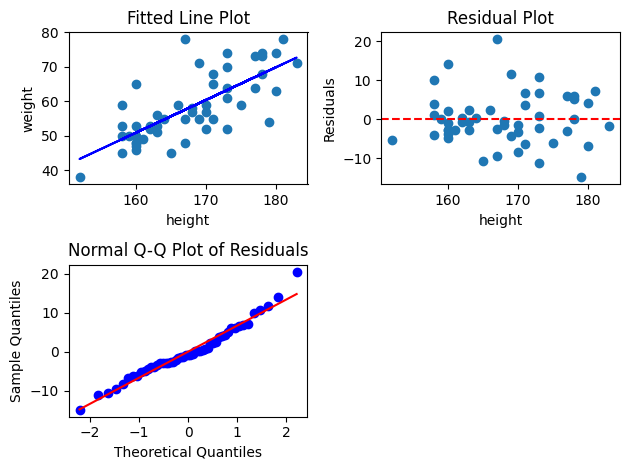

In [56]:
#잔차도, 적합도, 정규확률그림
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import regression
from scipy import stats
import pylab

# 2x2 그리드 중 첫 번째 위치에 그래프를 그립니다.
plt.subplot(2, 2, 1)
# 원본 데이터로 산점도(scatter plot)를 그립니다.
plt.plot(height, weight, 'o')
# 회귀분석 결과로부터 얻은 회귀선(적합값)을 그립니다.
plt.plot(height, fit.fittedvalues, 'b')
# height 선 적합도라는 제목
plt.title('Fitted Line Plot')
# x축 라벨 설정
plt.xlabel('height')
# y축 라벨 설정
plt.ylabel('weight')
# 그래프 요소들이 겹치지 않게 레이아웃을 조정합니다.
plt.tight_layout()

# 2x2 그리드 중 두 번째 위치에 그래프를 그립니다.
plt.subplot(2, 2, 2)
# 회귀분석 결과에서 잔차(residuals)를 가져옵니다.
residuals = fit.resid
# x축은 height, y축은 잔차로 산점도를 그립니다.
plt.plot(height, residuals, 'o')
# 잔차도의 기준이 되는 y=0 수평선을 붉은 점선으로 그립니다.
plt.axhline(y=0, color='r', linestyle='--')
# height 잔차도
plt.title('Residual Plot')
# x축 라벨 설정
plt.xlabel('height')
# y축 라벨 설정
plt.ylabel('Residuals')
# 그래프 요소들이 겹치지 않게 레이아웃을 조정합니다.
plt.tight_layout()

# 2x2 그리드 중 세 번째 위치에 그래프를 그립니다.
plt.subplot(2, 2, 3)
# 잔차(residuals)가 정규분포를 따르는지 확인하기 위해 Q-Q Plot을 그립니다.
stats.probplot(residuals, dist='norm', plot=plt)
# 잔차 정규 확률도
plt.title('Normal Q-Q Plot of Residuals')
# x축 라벨 설정
plt.xlabel('Theoretical Quantiles')
# y축 라벨 설정
plt.ylabel('Sample Quantiles')
# 그래프 요소들이 겹치지 않게 레이아웃을 조정합니다.
plt.tight_layout()

# 최종적으로 모든 그래프를 화면에 보여줍니다.
plt.show()


**-> p.445, p.446 풀어보기**

## 13. 분산분석

**독립변수: 범주형, 종속변수: 연속형**

**(관련 예제):  
안경의 표면 손상을 방지하는 A, B, C, D 네 종류의 코팅처리에 대하여 표면보호에 얼마나 효과가 있는지 비교하려 한다.  
네 종류로 코팅처리된 안경에서 표면의 마모도 데이터가 각각 주어진다.  
네 종류 코팅처리의 평균 마모도에 차이가 있다고 할 수 있는가?**

**다음 자료를 가지고 분산분석을 수행하라.(일원분산분석)**

->코팅 종류(범주형, 독립변수)에 따라 평균 마모도(연속형, 종속변수)에 통계적으로 유의미한 차이가 있는지를 분산분석(ANOVA)을 통해 검정

귀무가설 (H₀): "네 종류 코팅의 평균 마모도는 모두 같다.

대립가설 (H₁): "네 종류 코팅의 평균 마모도 중 적어도 하나는 다르다.

In [58]:
import numpy as np
import pandas as pd

y = np.array([10, 15, 8, 12, 15,
             14, 18, 21, 15,
             17, 16, 14, 15, 17, 15, 18,
             12, 15, 17, 15, 16, 15])

# A,B,C,D를 5,4,7,6번 반복한다.
treat = np.repeat(['A', 'B', 'C', 'D'],[5,4,7,6])
data = pd.DataFrame({'y':y, 'treat':treat})

In [61]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit = smf.ols('y ~ treat', data = data).fit()
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
treat,3.0,68.0,22.666667,4.340426,0.018136
Residual,18.0,94.0,5.222222,NaN,NaN


**-> treat의 pvalue < 0.05이므로 네 종류는 차이가 있다.**

## 14. 범주형 자료분석

**카이제곱 검정 (Chi-squared Test)**
주로 범주형 자료 분석에 사용되는 통계적 방법입니다. 핵심은 '실제로 관찰된 빈도(Observed Frequency)'와 '이론적으로 기대되는 빈도(Expected Frequency)' 사이의 차이가 통계적으로 의미가 있는지를 판단하는 것입니다. 이 차이를 바탕으로 카이제곱 통계량(χ2)이라는 단일 값을 계산하며, 이 값이 클수록 관찰된 결과가 우연히 발생했을 가능성은 낮아집니다. 이 검정 방법을 사용하여 아래의 세 가지 구체적인 목적을 달성할 수 있습니다.

**적합도 검정 (Goodness-of-Fit Test)**
하나의 변수에 대한 데이터가 특정 이론이나 알려진 비율에 잘 맞는가를 검정합니다.
(예: 이 주사위는 공정한가?)

**동질성 검정 (Test of Homogeneity)**
여러 집단이 특정 변수에 대해 서로 동일한 비율(분포)을 갖는가를 검정합니다.
(예: A, B 도시의 혈액형 분포는 동일한가?)

**독립성 검정 (Test of Independence)**
하나의 집단 내에서 관찰된 두 변수가 서로 관련이 있는가(연관성) 없는가(독립)를 검정합니다.
(예: 흡연 여부와 폐암 발병은 관련이 있는가?)

**(관련 예제1):  p.470 예제4(주어진 자료에 대한 귀무가설을 유의수준 0.05로 검정하라.)의 자료를 분석하라.**

**-> 적합도 검정 -> stats.chisquare() 사용**

In [62]:
import numpy as np
#관측도수
O = np.array([18, 55, 27])
Pr = np.array([0.25, 0.50, 0.25])
n = O.sum()
E = n * Pr
df = len(O) - 1

In [63]:
from scipy import stats

chi2, p = stats.chisquare(O, E)
print("Chi-square test for given probabilities",
     "\n","\n",
     "Chi-Squared: ", round(chi2, 4), "\n",
     "df: ",df,"\n",
     "P-value: ", round(p, 4))


Chi-square test for given probabilities 
 
 Chi-Squared:  2.62 
 df:  2 
 P-value:  0.2698


**-> pvalue가 크므로 귀무가설 기각X, 기대 비율을 따른다.**

**(관련 예제1): p.473 예제5(두 식이요법 간에 차이가 있다고 할 수 있는지 유의수준 0.05로 검정하라.)의 자료를 분석하라.**

**-> 동질성 검정 -> stats.chi2_contingency() 사용**

In [66]:
import pandas as pd
import numpy as np

diet = np.array([[37,24,19], [17,33,20]])
column_names = ['Good', 'Normal', 'Bad']
row_names = ['diet_A', 'diet_B']

table = pd.DataFrame(diet, columns=column_names, index=row_names)
table

,Good,Normal,Bad
diet_A,37,24,19
diet_B,17,33,20


In [69]:
from scipy import stats
# numpy 배열로 집어넣는다.
chi22, p2, dof, expected = stats.chi2_contingency(diet)
print("Pearson's Chi-squared test", "\n", "\n",
     "Chi-squared: ",round(chi22,4), "\n",
     "df: ", dof, "\n",
     "P-value: ", round(p2, 4))

Pearson's Chi-squared test 
 
 Chi-squared:  8.224 
 df:  2 
 P-value:  0.0164


**-> pvalue가 작으므로 귀무가설 기각한다. 즉, 식이요법 A와 B는 차이가 있다.**

**-> p.492, p.493 풀어보기!**